# FIT5196 Assessment 2 Task1
#### Student Name: Michael McKay
#### Student ID: 32270208

Date: 03/Jun/2021

Version: 1.0

Environment: Python x.x.xx and Jupyter notebook

Libraries used: please include the main libraries you used in your assignment here, e.g.,:
* pandas 
* re 
* matplotlib.pyplot

<span style="color: red"> Note that this is a sample notebook only. You will need to fill in the proper markdown and code blocks. You might also want to make necessary changes to the structure to meet your own needs. It is important to make sure the logic of how you finish the assessment is clearly shown in this notebook! </span>

## Import libraries 

In [1]:
# Code to import libraries as you need in this assessment, e.g.,
import pandas as pd
import re
import matplotlib.pyplot as plt

## Task 1. Auditing and cleansing the loaded data

Here, you should write your own code to audit data, identify data problems and to fix them. Also, record the found errors as required

<span style="color: red"> You might have complex notebook structure in this section, please feel free to create your own notebook structure. </span>

In [2]:
# Load the csv data into Jupyter notebook using pandas.
csv_data = pd.read_csv("dataset1_with_error.csv")

#Inspect the shape of dataFrame, and view the top 10 rows.
print(csv_data.shape)
csv_data.head(10)

(55169, 11)


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
0,12612628,Engineering Systems Analyst,Dorking,Gregory Martin International,NaN,permanent,Engineering Jobs,25000,20130708T120000,20130906T120000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Glasgow,Gregory Martin International,NaN,permanent,Engineering Jobs,30000,20120130T000000,20120330T000000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Hampshire,Gregory Martin International,NaN,permanent,Engineering Jobs,30000,20121221T150000,20130120T150000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Surrey,Gregory Martin International,NaN,permanent,Engineering Jobs,27500,20131208T150000,20140206T150000,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst",Surrey,Gregory Martin International,NaN,permanent,Engineering Jobs,25000,20130302T120000,20130501T120000,cv-library.co.uk
5,19047429,Trainee Mortgage Advisor East Midlands,East Midlands,Brite Recruitment,NaN,permanent,Accounting & Finance Jobs,21000,20130103T000000,20130403T000000,cv-library.co.uk
6,20199757,"PROJECT ENGINEER, PHARMACEUTICAL",Witney,MatchBox Recruiting Ltd,NaN,permanent,Healthcare & Nursing Jobs,37500,20120412T150000,20120611T150000,cv-library.co.uk
7,20797143,Chef de Partie Award Winning Restaurant Exce...,Derby,Chef Results,-,-,Hospitality & Catering Jobs,16000,20130328T120000,20130527T120000,caterer.com
8,22579462,Quality Engineer,Gateshead,Asset Appointments,NaN,permanent,Engineering Jobs,22000,20131222T150000,20140220T150000,cv-library.co.uk
9,22933091,Chef de Partie Award Winning Dining Live In ...,UK,Chef Results,-,-,Hospitality & Catering Jobs,18000,20131219T000000,20140102T000000,caterer.com


In [3]:
# View info regarding the attributes in the dataFrame.
print(csv_data.info())

# Once inputted and cleaning has been completed, the id column should be an integer.  Title, Location, Company
# ContractType, ContractTime, Category, OpenDate, CloseDate and SourceName should all be strings.  As objects in
# dataFrames rever to strings, no further change to the data type needs to be done.  Salary needs to be present as 
# a float.  So the data type for this column will need to be changes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55169 entries, 0 to 55168
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            55169 non-null  int64 
 1   Title         55169 non-null  object
 2   Location      55169 non-null  object
 3   Company       51320 non-null  object
 4   ContractType  33493 non-null  object
 5   ContractTime  47047 non-null  object
 6   Category      55169 non-null  object
 7   Salary        53584 non-null  object
 8   OpenDate      55169 non-null  object
 9   CloseDate     55169 non-null  object
 10  Source        55169 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.6+ MB
None


In [4]:
# Determine how many unique values are in the ID.
len(csv_data.Id.unique())

55169

In [5]:
# View description of the dataFrame.
csv_data.describe()

,Id
count,5.516900e+04
mean,6.883927e+07
std,4.244664e+06
min,1.261263e+07
25%,6.834702e+07
50%,6.921178e+07
75%,7.123341e+07
max,7.270524e+07


In [6]:
# View description of the dataFrame including objects.
csv_data.describe(include=['O'])

,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
count,55169,55169,51320,33493,47047,55169,53584,55169,55169,55169
unique,55166,489,9064,4,4,8,3757,2194,2418,106
top,Quality Assurance Environmental Manager Nottin...,UK,,,permanent,IT Jobs,35000,20120415T150000,20131208T000000,totaljobs.com
freq,2,8397,1133,14902,33637,14344,1865,45,45,10102


In [7]:
# see how many rows there are with a duplicate title.
csv_data.duplicated(['Title'])

0        False
1        False
2        False
3        False
4        False
         ...  
55164    False
55165     True
55166     True
55167    False
55168     True
Length: 55169, dtype: bool

In [8]:
# Have a look at dataFrame to see what the values are which are duplicated.
csv_data.Title.value_counts()

Quality Assurance Environmental Manager Nottingham, East Midlands     2
Pensions Administrators (Temporary/Contract)                          2
Senior Financial Advisor                                              2
Experienced KS**** EBD Teaching Assistant  Milton Keynes              1
Assembly Supervisor                                                   1
                                                                     ..
Audit Manager  Media and Marketing                                    1
Information Security Consultant  Identity and Access Management       1
Senior Sale Support Wolverhampton ****                                1
Process Engineer / Technician (Injection Moulding)                    1
P/T Guidance Officer  Employment and Enterprise [DBS/CRB required]    1
Name: Title, Length: 55166, dtype: int64

In [9]:
# Make a list containing the duplicate titles.

dup_check = csv_data.loc[csv_data.duplicated('Title'), :]

print('There are',len(dup_check),' duplicate items.')

dup_check_list = list(dup_check['Title'])

dup_csv_data = csv_data[csv_data.Title.isin(dup_check_list)]

# View the dataframe, sorted by Title.
dup_csv_data.sort_values(by=['Title'])


There are 3  duplicate items.


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
47471,71808610,Pensions Administrators (Temporary/Contract),UK,Abenefit2u,-,contract,Accounting & Finance Jobs,24000,20130801T150000,20130831T150000,professionalpensionsjobs.com
55165,72705205,Pensions Administrators (Temporary/Contract),UK,Abenefit2u,NaN,contract,Accounting & Finance Jobs,24000,20130801T150000,20130831T150000,cv-library.co.uk
8023,67290277,Quality Assurance Environmental Manager Nottin...,Nottingham,Stephen James Consulting,NaN,permanent,Healthcare & Nursing Jobs,35000.0,20120110T150000,20120409T150000,tntjobs.co.uk
55168,72705244,Quality Assurance Environmental Manager Nottin...,Nottingham,Stephen James Consulting,NaN,permanent,Healthcare & Nursing Jobs,35000.0,20120110T150000,20120409T150000,tntjobs.co.uk
34675,70086310,Senior Financial Advisor,London,Fram Executive Search,-,permanent,Accounting & Finance Jobs,40000,20130126T000000,20130225T000000,ifaonlinejobs.co.uk
55166,72705221,Senior Financial Advisor,London,Fram Executive Search.,-,permanent,Accounting & Finance Jobs,40000,20130126T000000,20130225T000000,ifaonlinejobs.co.uk


In [10]:
# Remove the duplicated values.
csv_data = csv_data.drop_duplicates(['Title'])

print(csv_data.shape)
csv_data.describe(include=['O'])

(55166, 11)


,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
count,55166,55166,51317,33492,47044,55166,53581,55166,55166,55166
unique,55166,489,9063,4,4,8,3757,2194,2418,106
top,Experienced KS**** EBD Teaching Assistant Mil...,UK,,,permanent,IT Jobs,35000,20120415T150000,20131208T000000,totaljobs.com
freq,1,8396,1133,14902,33635,14344,1865,45,45,10102


In [11]:
#Inspect the contents of the Location column.  There are a fair few columns with only one value.
#These look like spelling mistakes.
csv_data.Location.value_counts()

UK                   8396
London               7045
South East London    2961
The City             1184
Central London        889
                     ... 
Manchaster              1
BRISTOL                 1
Cembridge               1
Leads                   1
Livepool                1
Name: Location, Length: 489, dtype: int64

In [12]:

#need function to normalise the location names.
def normaliseLocation(input_str):
    if pd.isnull(input_str):
        return input_str
    else:
        #change input string to upper case.
        input_str = input_str.upper()
        #remove any special characters except space and dot.
        input_str = re.sub(r'([^\w\s\.]|_)', '', input_str)
        #remove multiple spaces with a single space, and trim spaces on either side.
        input_str = re.sub('\s+', ' ', input_str)
        #remove any special characters except space and dot.
        input_str = re.sub(r'THE\s', '', input_str)
        return input_str

csv_data['Location'] = csv_data['Location'].apply(lambda x: normaliseLocation(x))

#print(csv_data.head(10))

#check the similar between two string
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

from collections import Counter

#need function for matching high frequency to low frequency occuring location names.

def match_highfreq_To_lowfreq(data, min_threshold, max_threshold):
    
    lowfreq_data_list = [k for k,v in Counter(data).items() if v<=5]
    print ("Number of lowfreq_data", len(lowfreq_data_list))
    highfreq_data_list = list(set(data[~(data.isnull())]).difference(lowfreq_data_list))
    print ("Number of highfreq_data", len(highfreq_data_list))

    match_data={}
    for lowfreq_data in lowfreq_data_list:
        for highfreq_data in highfreq_data_list:
            ratio = similar(lowfreq_data.upper(), highfreq_data.upper())
            if ratio >= min_threshold and ratio <= max_threshold:
                match_data[lowfreq_data] = highfreq_data
                print(lowfreq_data, ":", highfreq_data, ratio)
    return match_data

match_data=match_highfreq_To_lowfreq(csv_data.Location, 0.8, 1)


Number of lowfreq_data 5
Number of highfreq_data 478
CEMBRIDGE : CAMBRIDGE 0.8888888888888888
OXFORDS : OXFORD 0.9230769230769231
LEADS : LEEDS 0.8
LIVEPOOL : LIVERPOOL 0.9411764705882353
MANCHASTER : MANCHESTER 0.9
MANCHASTER : LANCASTER 0.8421052631578947


In [13]:
# run match_highfreq_To_lowfreq with a match factor of 0.9, then update locations into a new column.
match_data=match_highfreq_To_lowfreq(csv_data.Location, 0.9, 1)
csv_data['temp_Location'] = csv_data.Location.replace(match_data)

# run again with a match factor of 0.8, and then update values in the new column.
match_data=match_highfreq_To_lowfreq(csv_data.temp_Location, 0.8, 1)
csv_data['temp_Location'] = csv_data.temp_Location.replace(match_data)

# capitilize only the first character in the location name (unless name is UK) to make it look more presentable.

def capitaliseTitle(inp_str):
    # return input if input is null.
    if pd.isnull(inp_str):
        return inp_str
    
    # return UK if input is UK.
    elif inp_str == 'UK':
        return inp_str
    
    # return LTD if input is LTD.
    elif inp_str == 'LTD':
        return inp_str
    
    # otherwise turn string into a list seperated by space, capitalize first letter of each work, combine back into
    # a new output string.  Return the output string.
    else:
        inp_list = inp_str.split(' ')
        outp_list = [entry.capitalize() for entry in inp_list]
        outp_str = ' '.join(outp_list)
    
    return outp_str
        
csv_data['temp_Location'] = csv_data.temp_Location.apply(lambda x: capitaliseTitle(x))

Number of lowfreq_data 5
Number of highfreq_data 478
OXFORDS : OXFORD 0.9230769230769231
LIVEPOOL : LIVERPOOL 0.9411764705882353
MANCHASTER : MANCHESTER 0.9
Number of lowfreq_data 2
Number of highfreq_data 478
CEMBRIDGE : CAMBRIDGE 0.8888888888888888
LEADS : LEEDS 0.8


In [14]:
csv_data.temp_Location.value_counts()

UK                   8396
London               7047
South East London    2961
City                 1194
Central London        889
                     ... 
Normanton              11
St. Neots              10
South Brent            10
Thorpe St. Andrew      10
North Finchley          7
Name: temp_Location, Length: 478, dtype: int64

In [15]:
csv_data.temp_Location.replace({'Oxfords':'Oxford'},inplace=True)
csv_data.temp_Location.value_counts()

UK                   8396
London               7047
South East London    2961
City                 1194
Central London        889
                     ... 
Normanton              11
St. Neots              10
South Brent            10
Thorpe St. Andrew      10
North Finchley          7
Name: temp_Location, Length: 478, dtype: int64

In [16]:
# delete the original location column and rename temp_Location to location.
del csv_data['Location']
csv_data = csv_data.rename(columns = {'temp_Location':'Location'})

In [17]:
#Inspect the contents of the Company column.  There are a fair few columns with only one value.
#These look like spelling mistakes.
csv_data.Company.value_counts()

                             1133
UKStaffsearch                 498
-                             406
Randstad                      402
CVbrowser                     328
                             ... 
Links Medical Practice          1
All Temps Recruitment Ltd       1
Next Move IT                    1
Protocol                        1
Care Fertility                  1
Name: Company, Length: 9063, dtype: int64

In [18]:
#need function to normalise the location names.
def normaliseCompany(input_str):
    if pd.isnull(input_str):
        input_str = ''
        return input_str
    else:
        # normalize to upper case letters
        input_str = input_str.upper()
         # remove special character at the start of the string.
        input_str = re.sub(r"^\W+", "", input_str)
        # remove special character at the end
        input_str = re.sub(r"\W+$", "", input_str)
        # replace LIMITED with LTD
        input_str = input_str.replace("LIMITED", "LTD")
        # replace LTD. with LTD
        input_str = input_str.replace("LTD.", "LTD")
        # replace " AND " with " & " for processing 
        input_str = input_str.replace(" & ", " AND ")
        # remove all special characters except space and dot
        input_str = re.sub(r'([^\w\s\.]|_)', '', input_str)
        # replace multiple spaces with a single space, also trim spaces on both side
        input_str = re.sub( '\s+', ' ', input_str).strip()
        
        return input_str

print (len(set(csv_data['Company'])), "different companies in the current data set")
csv_data['temp_Company'] = csv_data['Company'].apply(lambda x: normaliseCompany(x))
print (len(set(csv_data['temp_Company'])), "different companies after normalization")

# do a scan where a count of <= 1 is considered a low frequency.
match_data=match_highfreq_To_lowfreq(csv_data.temp_Company, 0.95, 1)


9064 different companies in the current data set
8542 different companies after normalization
Number of lowfreq_data 6599
Number of highfreq_data 1943
EDSTAFF LTD : EDUSTAFF LTD 0.9565217391304348
BMS GRADUATE : BMS GRADUATES 0.96
SOLUTION RECRUITMENT : SOLUTIONS RECRUITMENT 0.975609756097561
SIGMAR RECRUITMENT : SIGMA RECRUITMENT 0.9714285714285714
TRAVAIL EMPLYMENT GROUP : TRAVAIL EMPLOYMENT GROUP 0.9787234042553191
SHAW HEALTH CARE : SHAW HEALTHCARE 0.967741935483871
DERBYSHIRE COUNTY COUNCIL 2 : DERBYSHIRE COUNTY COUNCIL 0.9615384615384616
TRAVAIL EMPLOYMNET GROUP : TRAVAIL EMPLOYMENT GROUP 0.9583333333333334
BE PERSONNEL LTD : E PERSONNEL LTD 0.967741935483871
HW ASSOCIATES RECRUITMENT LTD : HWA ASSOCIATES RECRUITMENT LTD 0.9830508474576272
ASHTON RECRUITMENT : ASTON RECRUITMENT 0.9714285714285714
SOLUTIONS2RECRUITMENT : SOLUTIONS RECRUITMENT 0.9523809523809523
BADENOCHCLARK : BADENOCH CLARK 0.9629629629629629
ADDITIONAL RESOURCE : ADDITIONAL RESOURCES 0.9743589743589743
ANGLIAN H

In [19]:
# search criteria above has come back with too many false positives.  We can correct some obvious spelling errors
# and run the routine again using sticter criteria.

def spellFixCompany(inp_str):
    if pd.isnull(inp_str):
        inp_str = ''
        return inp_str
    else:
        inp_str = inp_str.replace("EMPLYMENT", "EMPLOYMENT")
        inp_str = inp_str.replace("EMLOYMENT", "EMPLOYMENT")
        inp_str = inp_str.replace("EMPLOYMNET", "EMPLOYMENT")
        inp_str = inp_str.replace("HEALTHCARE", "HEALTH CARE")
        inp_str = inp_str.replace("EDSTAFF", "EDUSTAFF")
        inp_str = inp_str.replace("GRADUATE", "GRADUATES")
        inp_str = inp_str.replace("SIGMAR", "SIGMA")
        inp_str = inp_str.replace("DERBYSHIRE COUNTY COUNCIL 2", "DERBYSHIRE COUNTY COUNCIL")
        inp_str = inp_str.replace("RESOURCE", "RESOURCES")
        inp_str = inp_str.replace("JAMIE S", "JAMIES")
        inp_str = inp_str.replace("HEATHCARE", "HEALTHCARE")
        inp_str = inp_str.replace("INSPIRE", "INSPIRED")
        inp_str = inp_str.replace("NON STOP", "NONSTOP")
        inp_str = inp_str.replace("COBURGBANKS", "COBURG BANKS")
        inp_str = inp_str.replace("CCITY", "C CITY")
        inp_str = inp_str.replace("BLUETOWNONLINE", "BLUETOWN ONLINE")
        inp_str = inp_str.replace("RECRUIMENT", "RECRUITMENT")
        inp_str = inp_str.replace("WEBRECRUIT", "WEB RECRUIT")
        inp_str = inp_str.replace("PEOPLE COM", "PEOPLECOM")
        inp_str = inp_str.replace("CONSULATANT", "CONSULTANT")
        inp_str = inp_str.replace("D P", "DP")
        inp_str = inp_str.replace("NON STOP", "NONSTOP")
        inp_str = inp_str.replace("PERSONNELRI", "PERSONNEL")
        inp_str = inp_str.replace("KIRKHAMYOUNG", "KIRKHAM YOUNG")
        inp_str = inp_str.replace("SPORTSDIRECT", "SPORTS DIRECT")
        return inp_str
    
csv_data['temp_Company'] = csv_data['temp_Company'].apply(lambda x: spellFixCompany(x))

print (len(set(csv_data['temp_Company'])), "different companies after spelling mistake fix.")

8518 different companies after spelling mistake fix.


In [20]:
# Our highest false positive has a match score of 0.975.  It's better to have some mismatching company names
# then it is to change a company name from something correct to something incorrect.  Try running the 
# match_highfreq_To_lowfreq function again with lower limit set to 0.98.
# do a scan where a count of <= 1 is considered a low frequency.
match_data=match_highfreq_To_lowfreq(csv_data.temp_Company, 0.98, 1)

Number of lowfreq_data 6576
Number of highfreq_data 1942
HW ASSOCIATES RECRUITMENT LTD : HWA ASSOCIATES RECRUITMENT LTD 0.9830508474576272
RECRUITMENT REVOLUTION.COM LTD : RECRUITMENTREVOLUTION.COM LTD 0.9830508474576272


In [21]:
#Inspect the contents of the Company column.  There are a fair few columns with only one value.
#These look like spelling mistakes.
match_data.pop('HW ASSOCIATES RECRUITMENT ', 'HWA ASSOCIATES RECRUITMENT ')
csv_data['temp_Company'] = csv_data['temp_Company'].replace(match_data)
print (len(set(csv_data['temp_Company'])), "different companies after string match.")

8516 different companies after string match.


In [22]:
# Now we will neaten up the Company field by capitilising the first letter in each word.
csv_data['temp_Company'] = csv_data['temp_Company'].apply(lambda x: capitaliseTitle(x))

In [23]:
csv_data['temp_Company'].value_counts()

                       5389
Ukstaffsearch           498
Randstad                403
Cvbrowser               328
Matchtech Group Plc     286
                       ... 
Premier Consultants       1
V G Clements Ltd          1
Vinspiredd                1
Mccurrach Uk Ltd          1
Middleton Jeffers         1
Name: temp_Company, Length: 8516, dtype: int64

In [24]:
del csv_data['Company']
csv_data = csv_data.rename(columns = {'temp_Company':'Company'})

In [25]:
#Inspect the contents of the ContractType column.  There are a lot of null, invalid entries.
csv_data.ContractType.value_counts()

             14902
full_time    12303
-             4719
part_time     1568
Name: ContractType, dtype: int64

In [26]:
#Replace all spaces and  N/A with '-'.  We will try and fill these null values in a future step.

def normalizeContractType(inp_str):
    if pd.isnull(inp_str):
        return inp_str
    else:
        # remove any spaces, or - characters.
        inp_str = re.sub(r'([\s-]+)', '', inp_str)
        inp_str = re.sub(r'(N/A)', '', inp_str)
        return inp_str
    
csv_data['ContractType'] = csv_data['ContractType'].apply(lambda x: normalizeContractType(x))
    
csv_data.ContractType.value_counts()

             19621
full_time    12303
part_time     1568
Name: ContractType, dtype: int64

In [27]:
#Inspect the contents of the ContractTime column.  There are a lot of null, invalid entries.
csv_data.ContractTime.value_counts()

permanent    33635
-             6249
contract      6088
              1072
Name: ContractTime, dtype: int64

In [28]:
#Replace all null values, N/A with '-'.  We will try and fill these null values in a future step.

def normalizeContractTime(inp_str):
    if pd.isnull(inp_str):
        return inp_str
    else:
        # remove any spaces, or - characters.
        inp_str = re.sub(r'([\s-]+)', '', inp_str)
        inp_str = re.sub(r'(N/A)', '', inp_str)
        return inp_str
    
csv_data['ContractTime'] = csv_data['ContractTime'].apply(lambda x: normalizeContractTime(x))

csv_data.ContractTime.value_counts()

permanent    33635
              7321
contract      6088
Name: ContractTime, dtype: int64

In [29]:
# looks like there are a lot of entries in the csv_data file where we can pull the contract type from description.

def extractContractType(inp_str):
    if pd.isnull(inp_str):
        return inp_str
    else:
        
        entry = inp_str.upper()
        
        #search for full time and part time.  Return nothing if both present.
        if (re.search(r"FULL TIME", entry)) and (re.search(r"PART TIME", entry)):
            output_str = ''
        
        # return full_time if full time only is present.
        elif (re.search(r"FULL TIME", entry)) and not (re.search(r"PART TIME", entry)):
            output_str = 'full_time'
            
        # return part_time if part time is present only.
        elif (re.search(r"PART TIME", entry)) and not (re.search(r"FULL TIME", entry)):
            output_str = 'part_time'
        else:
            output_str = ''
            
        return output_str

csv_data['temp_ContractType'] = csv_data['Title'].apply(lambda x: extractContractType(x))

csv_data[(csv_data.ContractType.isnull()) & (csv_data['Title'].str.contains('Full Time')) & (csv_data['Title'].str.contains('Part Time') == False)]

,Id,Title,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source,Location,Company,temp_ContractType
3453,65058913,Customer Service Officer Scarborough Full Time,NaN,NaN,Accounting & Finance Jobs,12872,20131213T150000,20140112T150000,MyUkJobs,Scarborough,Rbs,full_time
16759,68609341,Assessor Crown Prosecution Service ( Fixed Te...,NaN,NaN,Teaching Jobs,20850,20130518T120000,20130717T120000,MyUkJobs,West Midlands,The Intraining Group Ltd,full_time
16762,68609387,Maths And English Tutor (Fixed Term Full Time ...,NaN,NaN,Teaching Jobs,21855,20130622T150000,20130821T150000,MyUkJobs,Aldershot,The Intraining Group Ltd,full_time
21627,68786224,Full Time Promotions for Charities in Newcastl...,NaN,NaN,Sales Jobs,NaN,20120810T000000,20120824T000000,salestarget.co.uk,Newcastle Upon Tyne,Home Fundraising Ltd,full_time
24022,69011034,"Dental Practice Manager / PortisHead, Bristol ...",NaN,permanent,Healthcare & Nursing Jobs,21500,20120318T000000,20120616T000000,cv-library.co.uk,UK,Network Open,full_time
24056,69011266,Nuclear Medicine Technician Full Time Private,NaN,permanent,Healthcare & Nursing Jobs,31750,20121014T000000,20130112T000000,cv-library.co.uk,North West England,Medicspro,full_time
25362,69055689,Registered Nurse Full Time Permanent,NaN,NaN,Healthcare & Nursing Jobs,23040,20130804T120000,20130903T120000,MyUkJobs,Rotherham,Precedo Health Care,full_time
25366,69055752,Healthcare Assistant Full Time Permanent,NaN,NaN,Healthcare & Nursing Jobs,NaN,20131215T150000,20140114T150000,MyUkJobs,Sheffield,Precedo Health Care,full_time
31157,69682445,RGN Full Time **** Runcorn (Nights Days),NaN,NaN,Healthcare & Nursing Jobs,27135,20130520T150000,20130719T150000,careworx.co.uk,Runcorn,,full_time
33259,69930924,Full Time Customer Telephony Role,NaN,contract,Accounting & Finance Jobs,15360,20130326T000000,20130409T000000,cv-library.co.uk,UK,Brookstreet Uk,full_time


In [30]:
# now see if we can pull the contract period from the title field as well.

def extractContractTime(inp_str):
    if pd.isnull(inp_str):
        return inp_str
    else:
        
        entry = inp_str.upper()
    
        if (re.search(r"FIXED TERM", entry)):
            output_str = 'contract'
        elif (re.search(r"PERMANENT", entry)):
            output_str = 'permanent'
        else:
            output_str = ''
            
        return output_str

csv_data['temp_ContractTime'] = csv_data['Title'].apply(lambda x: extractContractTime(x))

csv_data[(csv_data.ContractType.isnull()) & (csv_data['Title'].str.contains('Full Time')) & (csv_data['Title'].str.contains('Part Time') == False)]

,Id,Title,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source,Location,Company,temp_ContractType,temp_ContractTime
3453,65058913,Customer Service Officer Scarborough Full Time,NaN,NaN,Accounting & Finance Jobs,12872,20131213T150000,20140112T150000,MyUkJobs,Scarborough,Rbs,full_time,
16759,68609341,Assessor Crown Prosecution Service ( Fixed Te...,NaN,NaN,Teaching Jobs,20850,20130518T120000,20130717T120000,MyUkJobs,West Midlands,The Intraining Group Ltd,full_time,contract
16762,68609387,Maths And English Tutor (Fixed Term Full Time ...,NaN,NaN,Teaching Jobs,21855,20130622T150000,20130821T150000,MyUkJobs,Aldershot,The Intraining Group Ltd,full_time,contract
21627,68786224,Full Time Promotions for Charities in Newcastl...,NaN,NaN,Sales Jobs,NaN,20120810T000000,20120824T000000,salestarget.co.uk,Newcastle Upon Tyne,Home Fundraising Ltd,full_time,
24022,69011034,"Dental Practice Manager / PortisHead, Bristol ...",NaN,permanent,Healthcare & Nursing Jobs,21500,20120318T000000,20120616T000000,cv-library.co.uk,UK,Network Open,full_time,
24056,69011266,Nuclear Medicine Technician Full Time Private,NaN,permanent,Healthcare & Nursing Jobs,31750,20121014T000000,20130112T000000,cv-library.co.uk,North West England,Medicspro,full_time,
25362,69055689,Registered Nurse Full Time Permanent,NaN,NaN,Healthcare & Nursing Jobs,23040,20130804T120000,20130903T120000,MyUkJobs,Rotherham,Precedo Health Care,full_time,permanent
25366,69055752,Healthcare Assistant Full Time Permanent,NaN,NaN,Healthcare & Nursing Jobs,NaN,20131215T150000,20140114T150000,MyUkJobs,Sheffield,Precedo Health Care,full_time,permanent
31157,69682445,RGN Full Time **** Runcorn (Nights Days),NaN,NaN,Healthcare & Nursing Jobs,27135,20130520T150000,20130719T150000,careworx.co.uk,Runcorn,,full_time,
33259,69930924,Full Time Customer Telephony Role,NaN,contract,Accounting & Finance Jobs,15360,20130326T000000,20130409T000000,cv-library.co.uk,UK,Brookstreet Uk,full_time,


In [31]:
# Now combine the temp_ContractTime and temp_ContractType with the main columns.  If a value is already in the
# in the main column we'd want to overwrite it with the new value, as we assume this to be more correct as it was
# pulled from the job description.

def combineContractColumn(inp_str):
    
    if pd.isnull(inp_str):
        return inp_str
    else:
        # split CSV input into a list.
        inp_list = inp_str.split(',')
    
        # if value extracted from the title is null, use the value in the ContractTime/Type column.
        if inp_list[0] == '':
            out_str = inp_list[1]
        else:
            out_str = inp_list[0]
    
    return out_str

# create a new ContractTime column which contains comma seperated values of temp Contract Time and Contract time.
csv_data['combine_ContractTime'] = csv_data['temp_ContractTime'] + ',' + csv_data['ContractTime']
 
# run CSV through combineContractColumn funtion, which will pick the first value if it's available, and second
# if it's not.
csv_data['combine_ContractTime'] = csv_data['combine_ContractTime'].apply(lambda x: combineContractColumn(x))

# create a new ContractType column which contains comma seperated values of temp Contract Time and Contract time.
csv_data['combine_ContractType'] = csv_data['temp_ContractType'] + ',' + csv_data['ContractType']

# run CSV through combineContractColumn funtion, which will pick the first value if it's available, and second
# if it's not.
csv_data['combine_ContractType'] = csv_data['combine_ContractType'].apply(lambda x: combineContractColumn(x))

In [32]:
# drop the unnecessary columns.

del csv_data['ContractTime']
del csv_data['ContractType']
del csv_data['temp_ContractTime']
del csv_data['temp_ContractType']

csv_data = csv_data.rename(columns = {'combine_ContractTime':'ContractTime'})
csv_data = csv_data.rename(columns = {'combine_ContractType':'ContractType'})

In [33]:
csv_data.head(10)

,Id,Title,Category,Salary,OpenDate,CloseDate,Source,Location,Company,ContractTime,ContractType
0,12612628,Engineering Systems Analyst,Engineering Jobs,25000,20130708T120000,20130906T120000,cv-library.co.uk,Dorking,Gregory Martin International,permanent,NaN
1,12612830,Stress Engineer Glasgow,Engineering Jobs,30000,20120130T000000,20120330T000000,cv-library.co.uk,Glasgow,Gregory Martin International,permanent,NaN
2,12612844,Modelling and simulation analyst,Engineering Jobs,30000,20121221T150000,20130120T150000,cv-library.co.uk,Hampshire,Gregory Martin International,permanent,NaN
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Jobs,27500,20131208T150000,20140206T150000,cv-library.co.uk,Surrey,Gregory Martin International,permanent,NaN
4,12613647,"Pioneer, Miser Engineering Systems Analyst",Engineering Jobs,25000,20130302T120000,20130501T120000,cv-library.co.uk,Surrey,Gregory Martin International,permanent,NaN
5,19047429,Trainee Mortgage Advisor East Midlands,Accounting & Finance Jobs,21000,20130103T000000,20130403T000000,cv-library.co.uk,East Midlands,Brite Recruitment,permanent,NaN
6,20199757,"PROJECT ENGINEER, PHARMACEUTICAL",Healthcare & Nursing Jobs,37500,20120412T150000,20120611T150000,cv-library.co.uk,Witney,Matchbox Recruiting Ltd,permanent,NaN
7,20797143,Chef de Partie Award Winning Restaurant Exce...,Hospitality & Catering Jobs,16000,20130328T120000,20130527T120000,caterer.com,Derby,Chef Results,,
8,22579462,Quality Engineer,Engineering Jobs,22000,20131222T150000,20140220T150000,cv-library.co.uk,Gateshead,Asset Appointments,permanent,NaN
9,22933091,Chef de Partie Award Winning Dining Live In ...,Hospitality & Catering Jobs,18000,20131219T000000,20140102T000000,caterer.com,UK,Chef Results,,


In [34]:
#Inspect the contents of the ContractType column.
csv_data.Category.value_counts()

IT Jobs                             14344
Healthcare & Nursing Jobs            8808
Engineering Jobs                     8210
Accounting & Finance Jobs            7136
Sales Jobs                           5349
Hospitality & Catering Jobs          4788
Teaching Jobs                        3779
PR, Advertising & Marketing Jobs     2752
Name: Category, dtype: int64

In [35]:
# Check for non-numeric characters in the salary column.

csv_data_Sal_list = list(csv_data['Salary'])

nonNumList = []

for entry in csv_data_Sal_list:
       
    if type(entry) == str:
        if (re.search(r"[\D]+", entry)):
            match = re.search(r"[\D]+", entry)
            nonNumList.append(match.group())

print(set(nonNumList))

{'/year', ' pa', 'K', ' To ', ' per Annum', ' - ', ' to ', '/Year', ' per annum', '-', '.'}


In [36]:
# This attribute can not be converted to a float as there are non-numeric values present.
# Salarys are present as 
# Use a RegEx expression to extract the numeric values into a new column.

def normalizeSalaries(inp_str):
   
    if pd.isnull(inp_str):
        return inp_str
    else:

        # Extract all numeric values from input using a regular expression.
        val_list = re.findall(r"[\d.]+",inp_str)
    
        # Extract text and - from input using a regular expression.
        text_list = re.findall(r"[a-zA-Z-]+", inp_str)
    
        # Concatinate all entrys in the text list into a single string.
        text_str = ""
        for entry in text_list:
            text_str += entry
    
        # If no values could be extracted from input, output null value.
        if not len(val_list):
            output = ''
        
        # return the value only if no text has been found.
        elif not len(text_str):
            output = val_list[0]
                
        # multiply by 1000 if K has been found.
        elif text_str.upper() == 'K':
            output = float(val_list[0]) * 1000
             
        # average the two values if a range is given.
        elif (text_str.upper() == 'TO') or (text_str.upper() == '-'):
            output = (float(val_list[0]) + float(val_list[1]))/2
               
        # work out annual salary assuming 40 hours worked per week and 52 weeksn per year.
        elif (text_str.upper() == 'PERHOUR') or (text_str.upper() == 'PH'):
            output = float(val_list[0]) * 40 * 52
            
        else:
            output = val_list[0]
        
        return output

csv_data['temp_Salary'] = csv_data['Salary'].apply(lambda x: normalizeSalaries(x))

csv_data['temp_Salary'] = pd.to_numeric(csv_data['temp_Salary'], downcast = "float")

csv_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55166 entries, 0 to 55167
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            55166 non-null  int64  
 1   Title         55166 non-null  object 
 2   Category      55166 non-null  object 
 3   Salary        53581 non-null  object 
 4   OpenDate      55166 non-null  object 
 5   CloseDate     55166 non-null  object 
 6   Source        55166 non-null  object 
 7   Location      55166 non-null  object 
 8   Company       55166 non-null  object 
 9   ContractTime  47044 non-null  object 
 10  ContractType  33492 non-null  object 
 11  temp_Salary   53208 non-null  float32
dtypes: float32(1), int64(1), object(10)
memory usage: 5.3+ MB


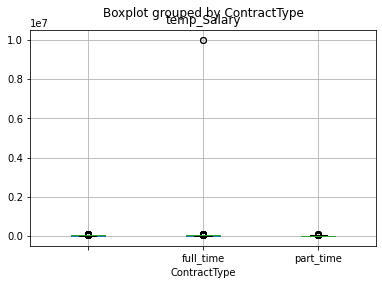

In [37]:
# Next to look for outliers.  Most likely place for an outlier to exist is within the salary column.
# We can find outliers by created a box-plot.

bp = csv_data.boxplot(column='temp_Salary', by = 'ContractType')


In [38]:
# We can see from the boxplot above that there are some salaries listed at 10,000,000 British pounds per year,
# which seems a bit high.  Let's see what positions these are.

csv_data[csv_data['temp_Salary'] > 1000000]

,Id,Title,Category,Salary,OpenDate,CloseDate,Source,Location,Company,ContractTime,ContractType,temp_Salary
26971,69181134,Office Technical Administrator,Engineering Jobs,10000000,20130325T120000,20130424T120000,workthing.com,Cheshire,Group Cytek,permanent,full_time,10000000.0
48506,71869302,New Business Development Exec/Manager,Teaching Jobs,10000000,20131122T120000,20140220T120000,jobs.guardian.co.uk,Central London,Periscope Uk Ltd,permanent,full_time,10000000.0


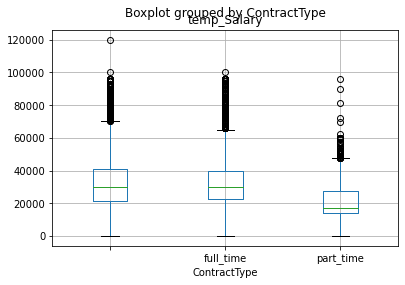

In [39]:
# Let's try creating a box plot without these values included.

csv_data_temp = csv_data[csv_data['temp_Salary'] < 1000000]

bp = csv_data_temp.boxplot(column='temp_Salary', by = 'ContractType')

In [40]:
# Box plot looks a lot better.  But we do have a lot of values where the salary is zero, which also isn't a valid
# salary per year (unless it's for volunteer work).  Let's have a look at the jobs where salary is 0.

csv_data_temp = csv_data[csv_data['temp_Salary'] == 0]

csv_data_temp

,Id,Title,Category,Salary,OpenDate,CloseDate,Source,Location,Company,ContractTime,ContractType,temp_Salary
1354,55408278,"Software Engineer, C++, MFC, STL ****k East ...",IT Jobs,0,20130824T150000,20131122T150000,planetrecruit.com,West Sussex,Spectrum It Recruitment,permanent,full_time,0.0
1379,55408791,Senior IT Project Manager Group IS Development,IT Jobs,0,20120103T150000,20120202T150000,planetrecruit.com,Cambridgeshire,Jobg8,permanent,full_time,0.0
1405,55409302,"Cisco Channel Sales Manager Wireless, Voice, ...",IT Jobs,0,20130205T000000,20130406T000000,planetrecruit.com,Surrey,Palm It Services,permanent,full_time,0.0
1411,55409391,"Software Developer C, ASPNet **** to 6 Mth C...",IT Jobs,0,20121208T000000,20130308T000000,planetrecruit.com,South Lanarkshire,Abrecco,contract,full_time,0.0
1413,55409436,Junior SQL Developer,IT Jobs,0,20130126T120000,20130426T120000,planetrecruit.com,Surrey,Jobg8,permanent,full_time,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
54603,72675839,Sales Manager / Engineering / West Midlands,Sales Jobs,0,20120515T000000,20120714T000000,totaljobs.com,UK,Hiredonline,permanent,,0.0
54606,72675881,NPI Manufacturing Engineer / Manufacturing Pro...,Engineering Jobs,0,20131224T120000,20140123T120000,totaljobs.com,Chichester,Trs Consulting,permanent,,0.0
55137,72697286,Training Delivery Instructor,Engineering Jobs,0,20120202T000000,20120303T000000,justengineers.net,UK,Minstrell Recruitment Ltd,permanent,,0.0
55139,72697334,Experienced Tree Surgeon,Engineering Jobs,0,20120726T000000,20120924T000000,justengineers.net,Poole,R S S Ltd,permanent,,0.0


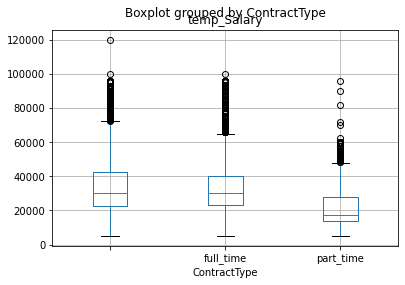

In [41]:
# None of these appear to be volunteer positions.  A quick search of the raw CSV file shows there are no
# volunteer jobs within this file.  Let's assume jobs with a salary of 0 should be null and plot our 
# box plot again.

def removeOutlierSalary(inp_val):
    if pd.isnull(inp_val):
        return inp_val
    else:
        # remove any spaces, or - characters.
        if (inp_val == 0):
            return None
        elif (inp_val == 10000000):
            return None
        
        return inp_val
    
csv_data['temp_Salary'] = csv_data['temp_Salary'].apply(lambda x: removeOutlierSalary(x))

# need to reconvert Salary to a float value.
csv_data['temp_Salary'] = pd.to_numeric(csv_data['temp_Salary'], downcast = "float")


bp = csv_data.boxplot(column='temp_Salary', by = 'ContractType')


In [42]:
# We can also tabulate the above data.
csv_data.groupby(['ContractType']).describe()

# Table shows that on full timer's are been offered more on average then what a part timer would be, which is
# what we'd expect as the full timers work more hours.  Data makes sense now.



Id                                                      \
                count          mean           std         min         25%   
ContractType                                                                
              19540.0  6.955616e+07  2.831896e+06  20797143.0  68677474.5   
full_time     12280.0  6.817415e+07  4.952753e+06  46626508.0  67746136.5   
part_time      1672.0  6.635599e+07  7.627527e+06  46626799.0  66919996.5   

                                                  temp_Salary                \
                     50%          75%         max       count          mean   
ContractType                                                                  
              69471174.0  71432710.25  72705240.0     18593.0  34280.460938   
full_time     69200698.0  71082402.00  72703193.0     11701.0  32587.923828   
part_time     69077438.5  70627595.25  72683737.0      1591.0  21945.953125   

                                                                         
                       std     min      25%      50%      75%       max  
ContractType                                                             
              16298.962891  5000.0  22500.0  30000.0  42500.0  120000.0  
full_time     14785.498047  5000.0  23000.0  30000.0  40000.0  100000.0  
part_time     11455.292969  5000.0  13920.0  17500.0  27600.0   96000.0

In [43]:
# delete Salary column, rename temp_Salary to Salary

del csv_data['Salary']

csv_data = csv_data.rename(columns = {'temp_Salary':'Salary'})

In [44]:
#Inspect the contents of the ContractType column.
csv_data.Source.value_counts()

totaljobs.com        10102
cv-library.co.uk      7840
jobsite.co.uk         3630
cwjobs.co.uk          3132
staffnurse.com        2778
                     ...  
workthing.com            5
scotsman.com             4
jobs.gponline.com        3
cvjobstore.com           1
thegraduate.co.uk        1
Name: Source, Length: 106, dtype: int64

In [45]:
#re-arrange all the columns.
csv_data = csv_data[['Id','Title','Location','Company','ContractType','ContractTime','Category','Salary','OpenDate','CloseDate','Source']]

In [46]:
csv_data.head(10)

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
0,12612628,Engineering Systems Analyst,Dorking,Gregory Martin International,NaN,permanent,Engineering Jobs,25000.0,20130708T120000,20130906T120000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Glasgow,Gregory Martin International,NaN,permanent,Engineering Jobs,30000.0,20120130T000000,20120330T000000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Hampshire,Gregory Martin International,NaN,permanent,Engineering Jobs,30000.0,20121221T150000,20130120T150000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Surrey,Gregory Martin International,NaN,permanent,Engineering Jobs,27500.0,20131208T150000,20140206T150000,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst",Surrey,Gregory Martin International,NaN,permanent,Engineering Jobs,25000.0,20130302T120000,20130501T120000,cv-library.co.uk
5,19047429,Trainee Mortgage Advisor East Midlands,East Midlands,Brite Recruitment,NaN,permanent,Accounting & Finance Jobs,21000.0,20130103T000000,20130403T000000,cv-library.co.uk
6,20199757,"PROJECT ENGINEER, PHARMACEUTICAL",Witney,Matchbox Recruiting Ltd,NaN,permanent,Healthcare & Nursing Jobs,37500.0,20120412T150000,20120611T150000,cv-library.co.uk
7,20797143,Chef de Partie Award Winning Restaurant Exce...,Derby,Chef Results,,,Hospitality & Catering Jobs,16000.0,20130328T120000,20130527T120000,caterer.com
8,22579462,Quality Engineer,Gateshead,Asset Appointments,NaN,permanent,Engineering Jobs,22000.0,20131222T150000,20140220T150000,cv-library.co.uk
9,22933091,Chef de Partie Award Winning Dining Live In ...,UK,Chef Results,,,Hospitality & Catering Jobs,18000.0,20131219T000000,20140102T000000,caterer.com


......

## Saving data
Save the cleaned data

In [47]:
# code to save output data
csv_data.to_csv('dataset1_solution.csv',index=False)

## Summary
Give a short summary and anything you would like to talk about assessment 2 part 1 here.